# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject
from HouseholdSpecializationModel import HouseholdSpecializationModelClass

import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

In [2]:
# Import Class
model = HouseholdSpecializationModelClass()


# Question 1

**Explain how you solve the model**

In [3]:
# To find the changes in HF/HM when alpha=[0.25 , 0.5 , 0.75] is found by making a for loop:

HF_HM_alpha = [] #defineing an empty list, for the values of HF/HM when alpha changes
alphas = [0.25, 0.50, 0.75] #the alpha values
sigma = 0.5
for alpha in alphas: #for loop
    model.par.alpha = alpha #importing the alpha from the Class
    opt = model.solve_discrete() #importing the discrete function
    HF_HM_alpha.append(opt.HF/opt.HM) #defining function HF/HM
HF_HM_alpha

/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:67: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


[0.3076923076923077, 1.0, 3.25]

In [4]:
#The same for sigma
HF_HM_sigma = []
sigmas = [0.5, 1.0, 1.5]
alpha = 0.5

for sigma in sigmas:
    model.par.sigma = sigma
    opt = model.solve_discrete()
    HF_HM_sigma.append(opt.HF/opt.HM)
HF_HM_sigma

/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikkelund/Library/CloudStorage/OneDrive-Personligt/Dokumenter/8 Semester/Python/projects-2023-frederikke-x2-og-sofie/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


[1.8333333333333333, 3.25, 4.666666666666667]

When $\alpha$ changes the values for $\frac{HF}{HM}$ becomes:
- $\alpha$ = 0.25 -> $\frac{HF}{HM}$ = 0.31
- $\alpha$  = 0.50 -> $\frac{HF}{HM}$ = 1.0
- $\alpha$  = 0.75 -> $\frac{HF}{HM}$ = 4.67

When sigma changes the values for HF/HM becomes:
- $\sigma$ = 0.5 -> $\frac{HF}{HM}$ = 1.83
- $\sigma$ = 1.0 -> $\frac{HF}{HM}$ = 3.25
- $\sigma$ = 1.5 -> $\frac{HF}{HM}$ = 4.67

# Question 2

Explain your code and procedure

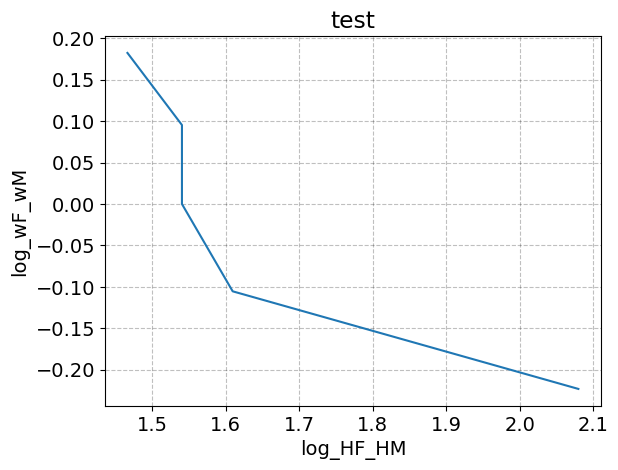

In [5]:
log_wF_wM = []
log_HF_HM = []
wFs = [0.8, 0.9, 1.0, 1.1, 1.2]

for wF in wFs:
    model.par.wF = wF
    opt = model.solve_discrete()
    log_wF_wM.append(np.log(model.par.wF/model.par.wM))
    log_HF_HM.append(np.log(opt.HF/opt.HM))
log_wF_wM


# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(log_HF_HM,log_wF_wM)

ax.set_title('test')
ax.set_xlabel('log_HF_HM')
ax.set_ylabel('log_wF_wM');

# Question 3

Explain your code and procedure

In [ ]:
# code

# Question 4

ADD CONCISE CONLUSION.